<a href="https://colab.research.google.com/github/divyani95/Radiation_Analysis/blob/main/Radiation_Analysis(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the Excel file
file_path = "/content/Book1.xlsx"
xls = pd.ExcelFile(file_path)

In [4]:
# Load the WMS12 and WMS26 sheets
df_wms12 = pd.read_excel(xls, sheet_name="WMS12")
df_wms26 = pd.read_excel(xls, sheet_name="WMS26")

In [5]:
# Clean the data
def clean_data(df):
    df = df.iloc[1:].reset_index(drop=True)  # Remove unit row
    df["Time Stamp"] = pd.to_datetime(df["Time Stamp"], errors='coerce')
    df["Wind Speed"] = pd.to_numeric(df["Wind Speed"], errors='coerce')
    df["Radiation GHI"] = pd.to_numeric(df["Radiation GHI"], errors='coerce')
    df["Ambient Temperature"] = pd.to_numeric(df["Ambient Temperature"], errors='coerce')
    return df.dropna(subset=["Time Stamp", "Wind Speed", "Radiation GHI", "Ambient Temperature"])

df_wms12 = clean_data(df_wms12)
df_wms26 = clean_data(df_wms26)

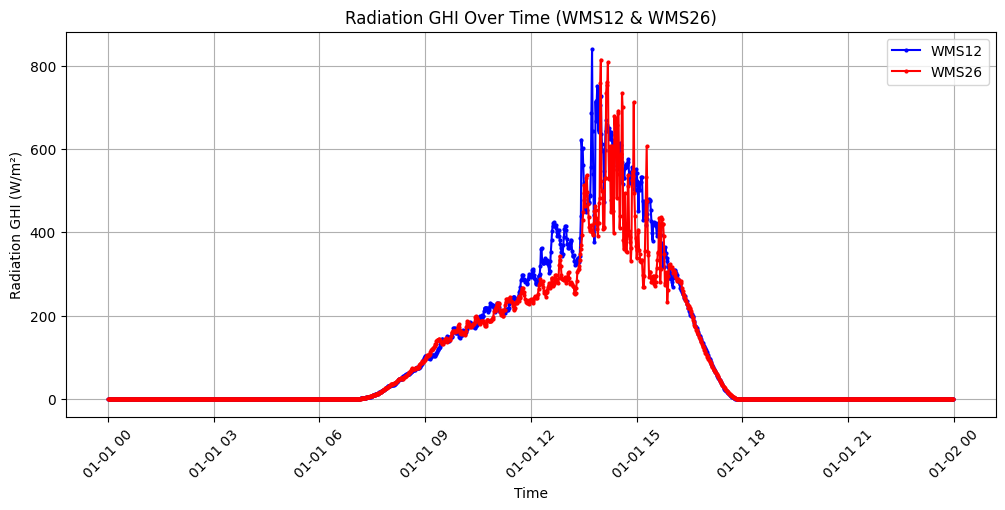

In [6]:
# Plot 1: Line plot - Radiation GHI over time
plt.figure(figsize=(12, 5))
plt.plot(df_wms12["Time Stamp"], df_wms12["Radiation GHI"], marker='o', linestyle='-', color='blue', markersize=2, label='WMS12')
plt.plot(df_wms26["Time Stamp"], df_wms26["Radiation GHI"], marker='o', linestyle='-', color='red', markersize=2, label='WMS26')
plt.xlabel("Time")
plt.ylabel("Radiation GHI (W/m²)")
plt.title("Radiation GHI Over Time (WMS12 & WMS26)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

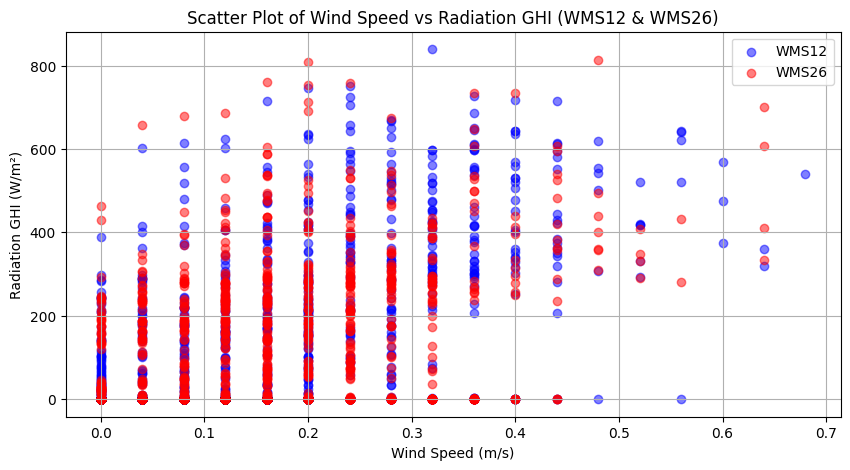

In [7]:
# Plot 2: Scatter plot - Wind Speed vs Radiation GHI
plt.figure(figsize=(10, 5))
plt.scatter(df_wms12["Wind Speed"], df_wms12["Radiation GHI"], alpha=0.5, color='blue', label='WMS12')
plt.scatter(df_wms26["Wind Speed"], df_wms26["Radiation GHI"], alpha=0.5, color='red', label='WMS26')
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Radiation GHI (W/m²)")
plt.title("Scatter Plot of Wind Speed vs Radiation GHI (WMS12 & WMS26)")
plt.legend()
plt.grid(True)
plt.show()

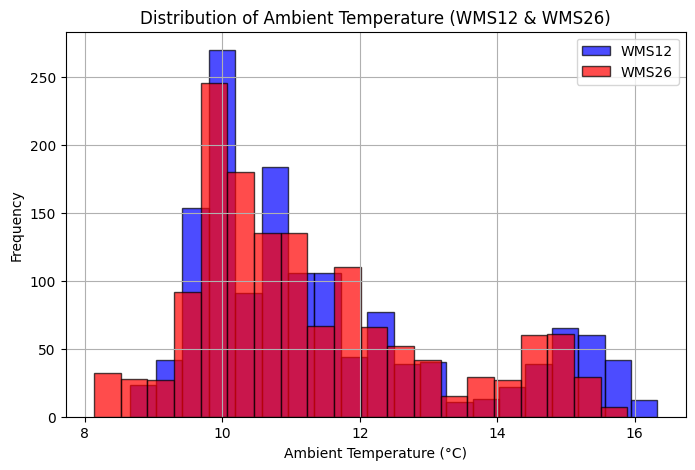

In [8]:
# Plot 3: Histogram - Ambient Temperature Distribution
plt.figure(figsize=(8, 5))
plt.hist(df_wms12["Ambient Temperature"], bins=20, color='blue', edgecolor='black', alpha=0.7, label='WMS12')
plt.hist(df_wms26["Ambient Temperature"], bins=20, color='red', edgecolor='black', alpha=0.7, label='WMS26')
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Ambient Temperature (WMS12 & WMS26)")
plt.legend()
plt.grid(True)
plt.show()